<a href="https://colab.research.google.com/github/Mainabryan/Boston-Hoston-Prediction/blob/main/Boston_house_prediction_(linear_multi_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the necessary libraries

In [2]:
#Data and model
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Warnings
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
data = pd.read_csv("/content/housing.xls")

In [4]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
data.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [6]:
data.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [11]:
data.describe(include = 'all')

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [13]:
data.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

# VISUALIZATION

#Histogram(For disribution)

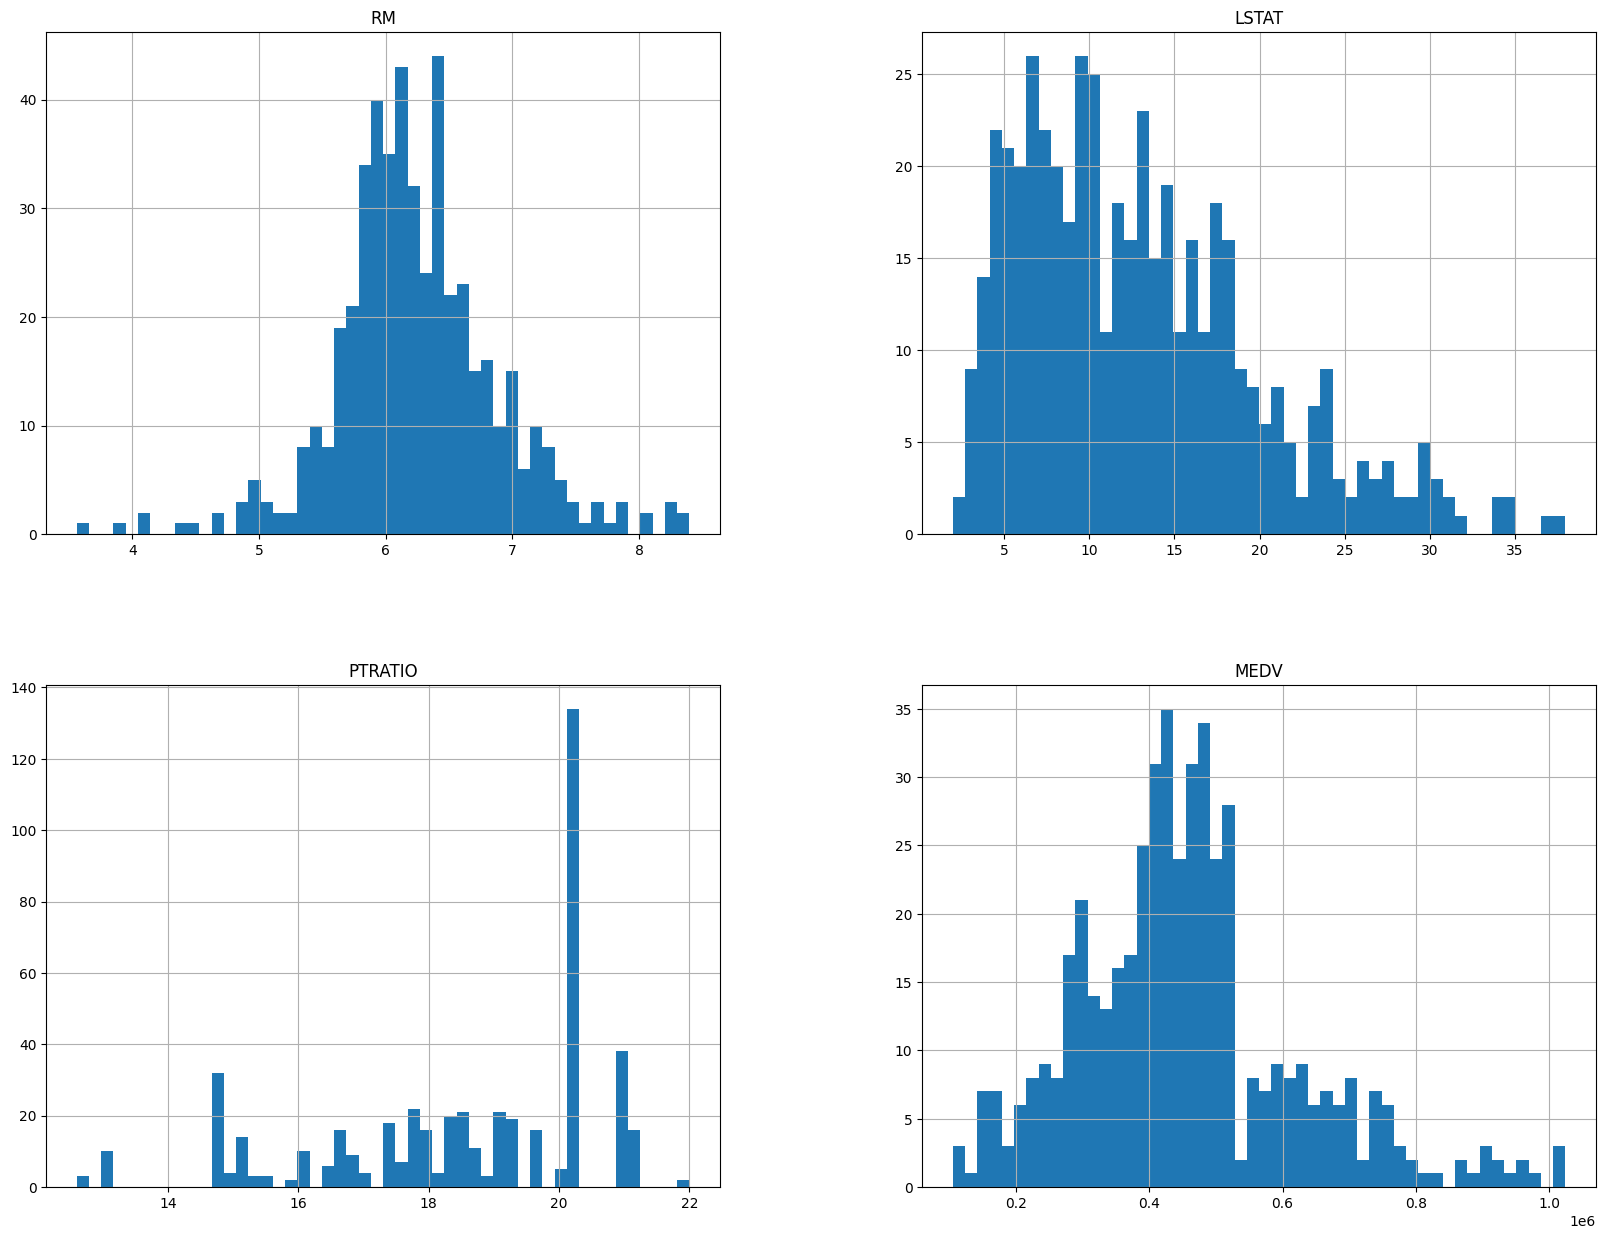

In [14]:
data.hist(bins=50, figsize=(20,15))
plt.show()

#Boxplot(to see outliers)

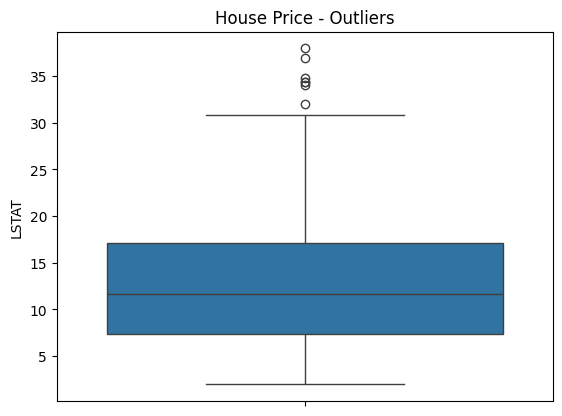

Outliers in RM:
        RM  LSTAT  PTRATIO       MEDV
97   8.069   4.21     18.0   812700.0
98   7.820   3.57     18.0   919800.0
176  7.765   7.56     17.8   835800.0
197  7.853   3.81     14.7  1018500.0
217  8.266   4.14     17.4   940800.0
218  8.040   3.13     17.4   789600.0
220  7.686   3.92     17.4   980700.0
224  8.337   2.47     17.4   875700.0
225  8.247   3.95     17.4  1014300.0
245  8.259   3.54     19.1   898800.0
253  8.398   5.91     13.0  1024800.0
263  7.691   6.58     18.6   739200.0
270  7.820   3.76     14.9   953400.0
272  7.645   3.01     14.9   966000.0
353  3.561   7.12     20.2   577500.0
355  3.863  13.33     20.2   485100.0
357  4.138  37.97     20.2   289800.0
367  4.368  30.63     20.2   184800.0
369  4.652  28.28     20.2   220500.0
389  4.138  23.34     20.2   249900.0
395  4.628  34.37     20.2   375900.0
397  4.519  36.98     20.2   147000.0


In [20]:
#Boxplot(to see outliers)
sns.boxplot(y=data['LSTAT']) # Changed df to data and removed trailing comma
plt.title("House Price - Outliers")
plt.show()

# Find outliers in RM using IQR
Q1 = data['RM'].quantile(0.25)
Q3 = data['RM'].quantile(0.75)
IQR = Q3 - Q1

# Changed df to data
rm_outliers = data[(data['RM'] < Q1 - 1.5*IQR) | (data['RM'] > Q3 + 1.5*IQR)]
print("Outliers in RM:")
print(rm_outliers)

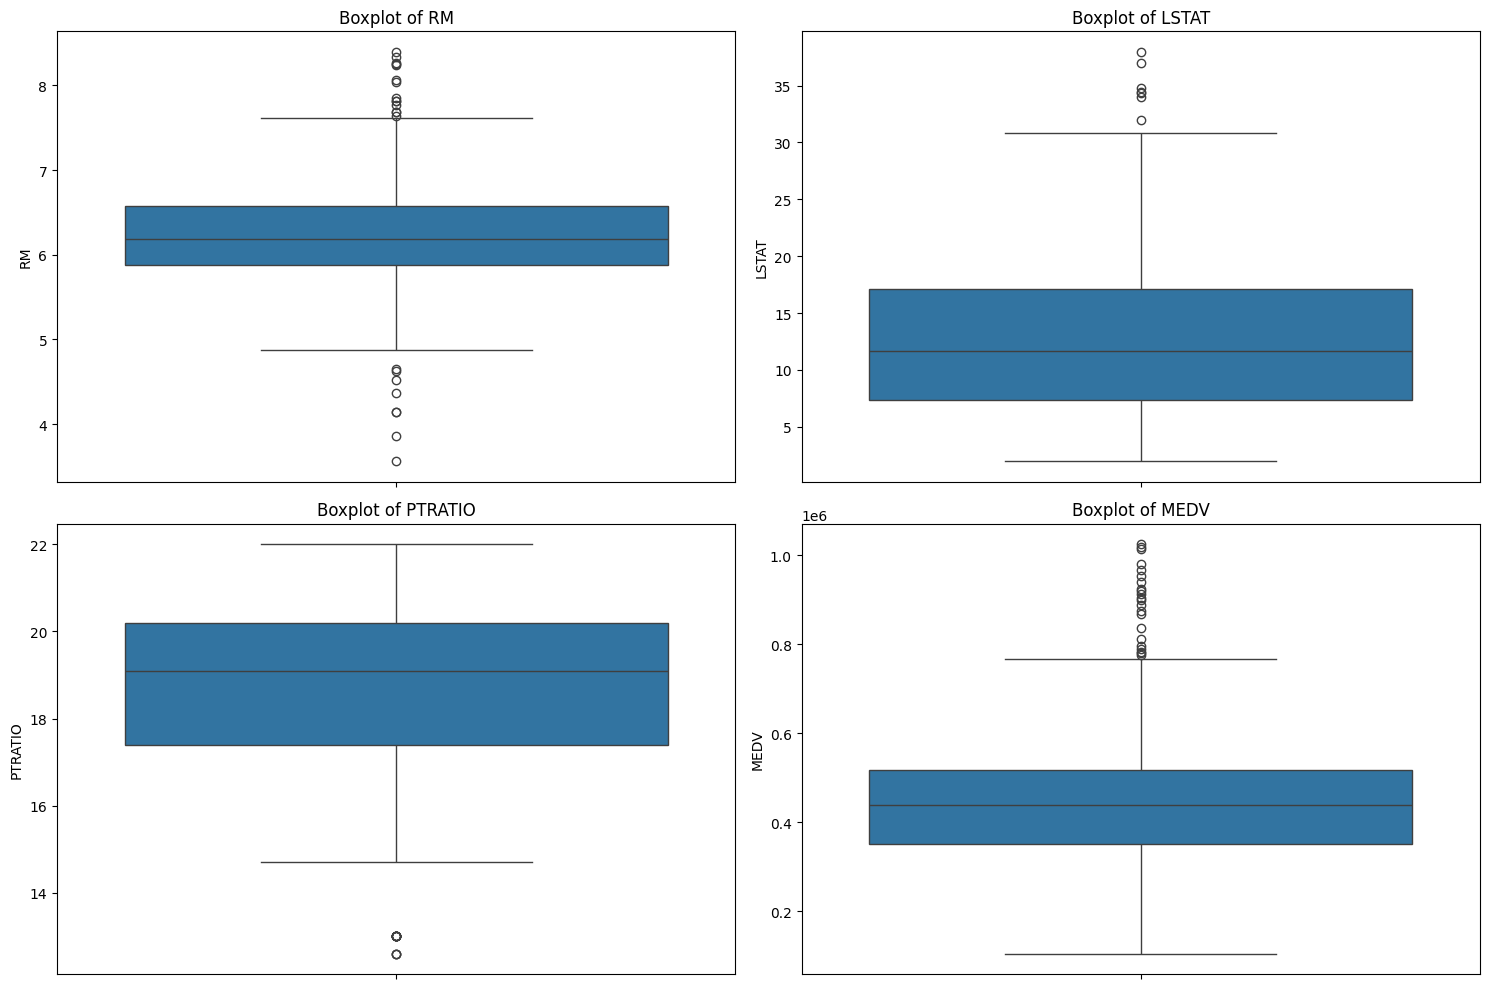

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()
